In [13]:
import numpy as np
import seaborn as sns
import pandas as pd

In [20]:
# KNN Implementation from scratch for binary classification

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def _euclidean_dist(self, x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _predict_one(self, x):
        distances = [self._euclidean_dist(x, x_train) for x_train in self.X_train]

        knn_indices = np.argsort(distances)[:self.k]

        knn_classes = [self.y_train[i] for i in knn_indices]

        majority_class = np.argmax(np.bincount(knn_classes))

        return majority_class

    def predict(self, X):
        y_pred = [self._predict_one(x) for x in X]
        return np.array(y_pred)

In [15]:
# Data
X_train = np.array([
    [1,2],
    [2,3],
    [3,3],
    [6,5],
    [7,7]
])

y_train = np.array([0,0,0,1,1])

X_test = np.array([
    [2,2],
    [6,6]
])

In [21]:
# Model Creation

model = KNNClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

[0 1]


<Axes: xlabel='X1', ylabel='X2'>

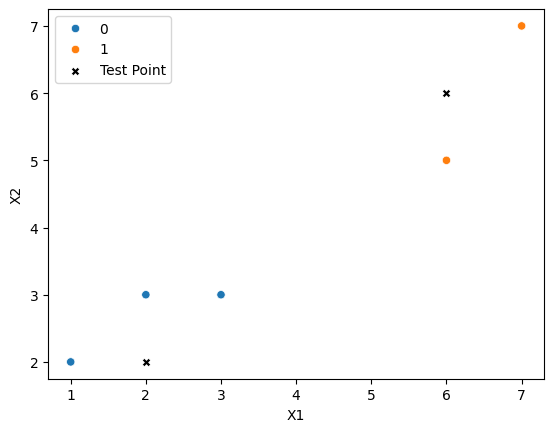

In [ ]:
# Visualisation
X_train_df = pd.DataFrame(X_train, columns=["X1", "X2"])
X_train_df["label"] = y_train

sns.scatterplot(
    data = X_train_df,
    x = "X1",
    y = "X2",
    hue = "label"
)

X_test_df = pd.DataFrame(X_test, columns=["X1", "X2"])

sns.scatterplot(
    data = X_test_df,
    x = "X1",
    y = "X2",
    color ="black",
    marker = "X",
    label = "Test Point"
)

In [ ]:
X_train_df

,X1,X2,label
0,1,2,0
1,2,3,0
2,3,3,0
3,6,5,1
4,7,7,1
